<a href="https://colab.research.google.com/github/sohataher/Hand-Gesture-Classification/blob/main/Hand_Gesture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Classification

This project focuses on classifying hand gestures using landmark data generated by MediaPipe from the HaGRID dataset. The dataset contains 18 different hand gestures, each represented by 21 hand landmarks (x, y, z coordinates). The goal is to train a machine learning model capable of recognizing and classifying these gestures.

#### HaGRID Gesture Samples  
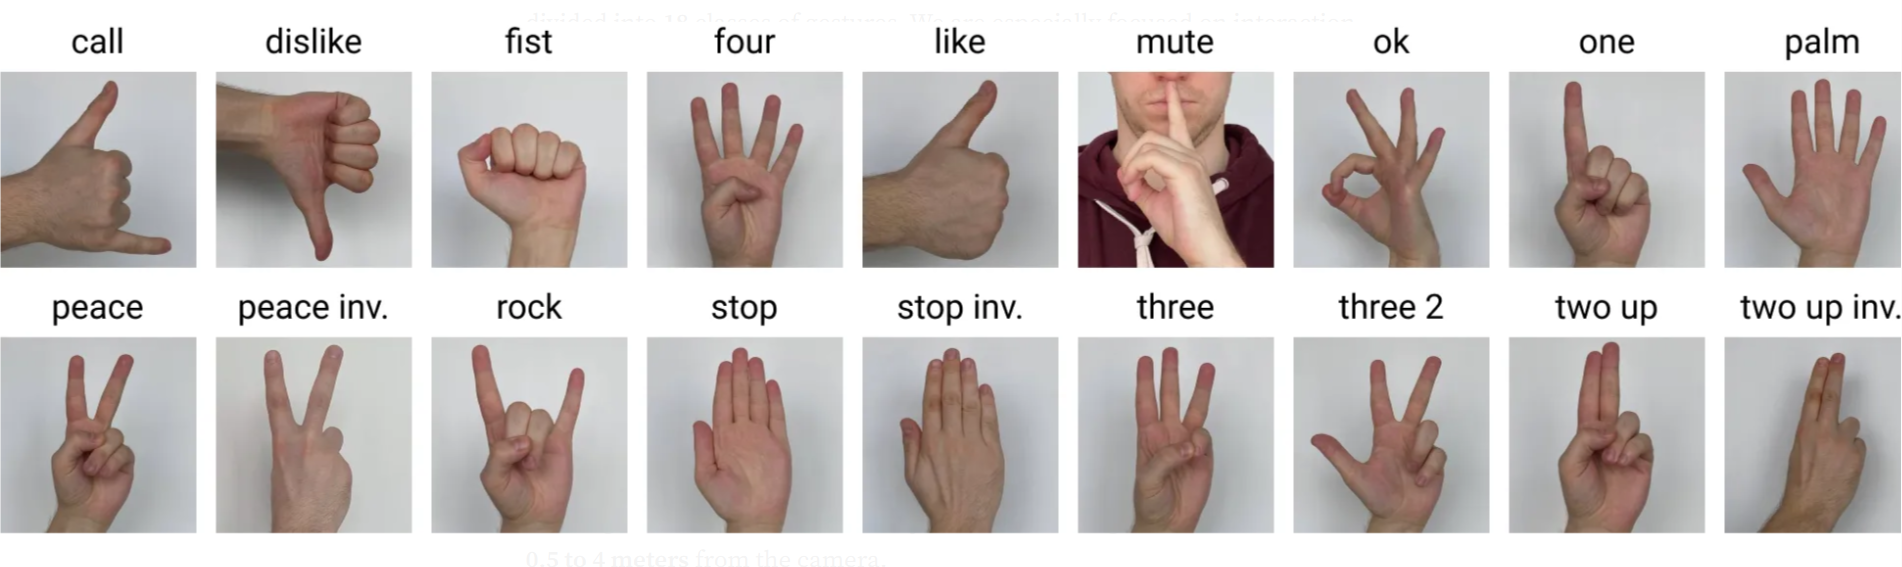

#### MediaPipe Hand Landmarks  
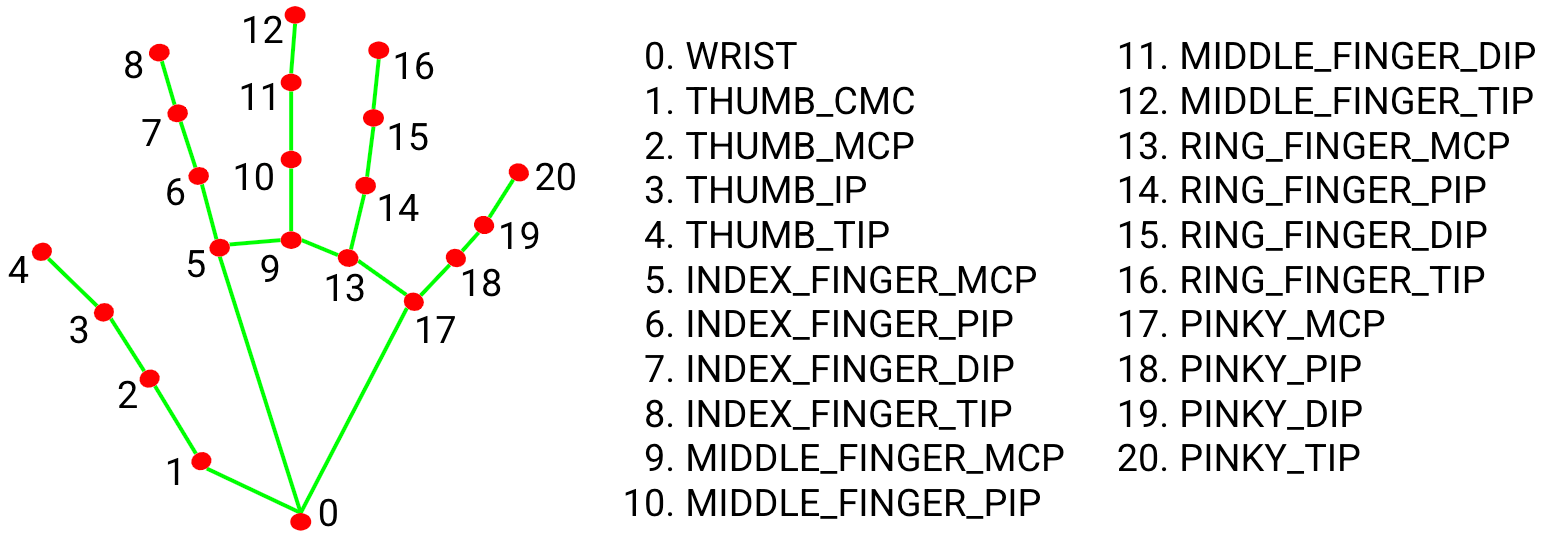

## Code Implementation

#### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing Essential Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SupervisedML_Project/hand_landmarks_data.csv')

df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [ ]:
df.shape

(25675, 64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

### Data Visualization

#### Hand Landmarks

In [ ]:
def plot_hand_2d(row_data, ax=None, title=""):
    """
    Plot 2D hand landmarks from a CSV row format.
    """
    # Extract just the coordinates (exclude label)
    coords = row_data[:-1]

    # Reshape to (21, 3) array and use only x,y coordinates
    landmarks = np.array(coords).reshape(21, 3)[:, :2]

    # Create figure if no axis provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Define connections between landmarks (MediaPipe hand connections)
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 4],  # Thumb
        [0, 5], [5, 6], [6, 7], [7, 8],  # Index
        [0, 9], [9, 10], [10, 11], [11, 12],  # Middle
        [0, 13], [13, 14], [14, 15], [15, 16], # Ring
        [0, 17], [17, 18], [18, 19], [19, 20], # Pinky
        [5, 9], [9, 13], [13, 17]  # Knuckles
    ]

    # Plot landmarks
    ax.scatter(landmarks[:, 0], landmarks[:, 1], c='r', marker='o', s=50)

    # Plot connections
    for connection in connections:
        start, end = connection
        ax.plot([landmarks[start, 0], landmarks[end, 0]],
                [landmarks[start, 1], landmarks[end, 1]], 'b-', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Invert y-axis to match image coordinates (if needed)
    ax.invert_yaxis()

    # Set title with gesture label
    gesture_label = row_data[-1] if len(row_data) > 63 else "Unknown"
    ax.set_title(f"{title}\nGesture: {gesture_label}")

    # Set equal aspect ratio
    ax.set_aspect('equal')

    return ax

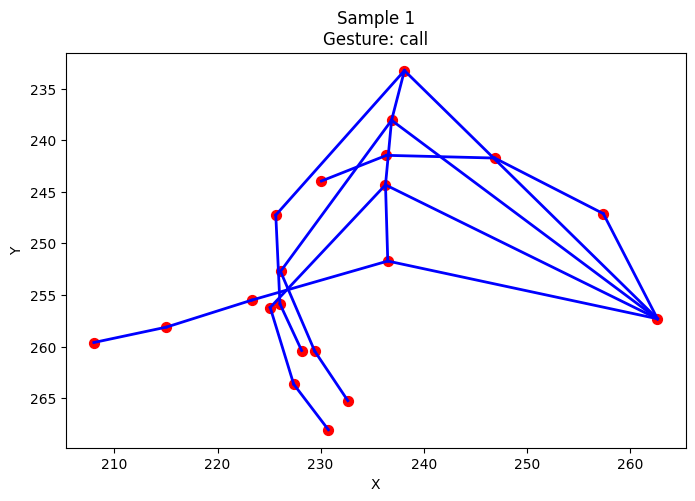

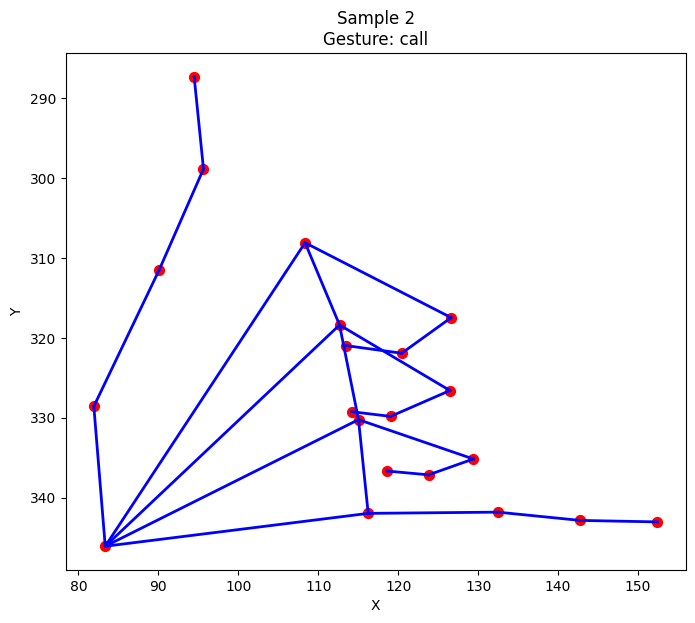

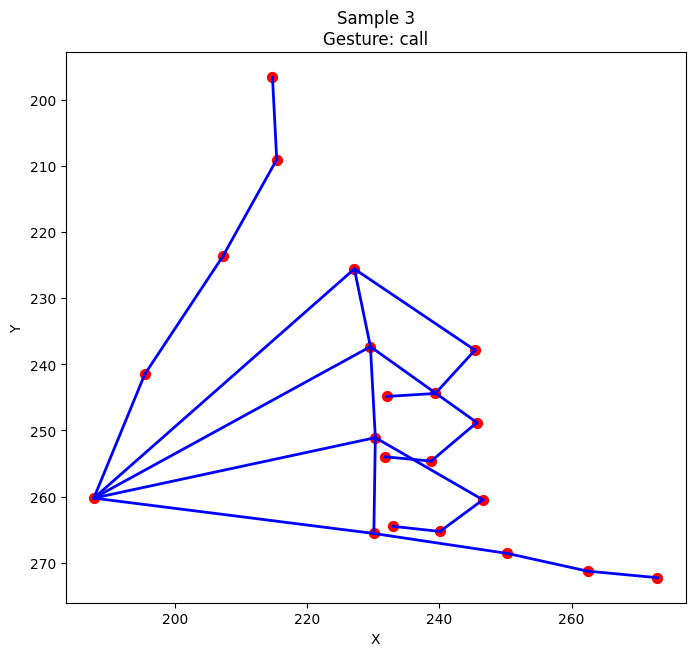

In [ ]:
# Visualize first few samples
for i in range(min(3, len(df))):  # Show first 3 samples
    row_data = df.iloc[i].values
    plot_hand_2d(row_data, title=f"Sample {i+1}")
    plt.show()

#### Class Distribution

<ipython-input-30-47191e900bff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="magma")


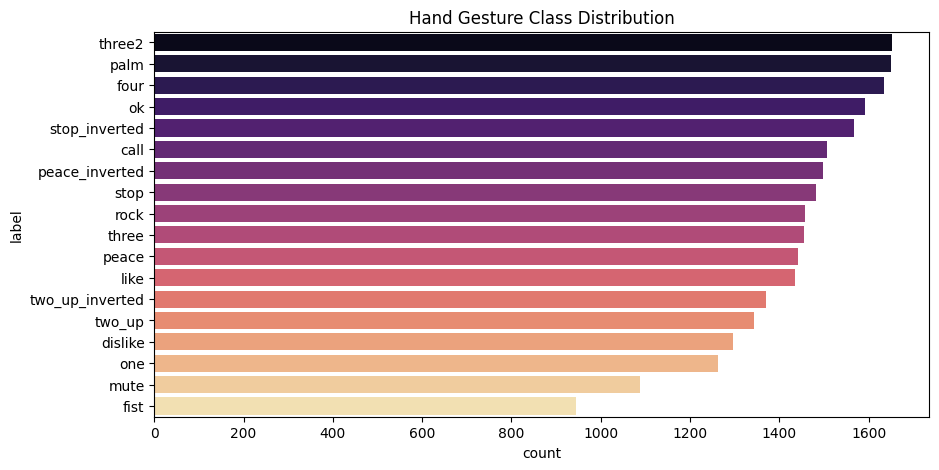

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="magma")
plt.title("Hand Gesture Class Distribution")
plt.show()

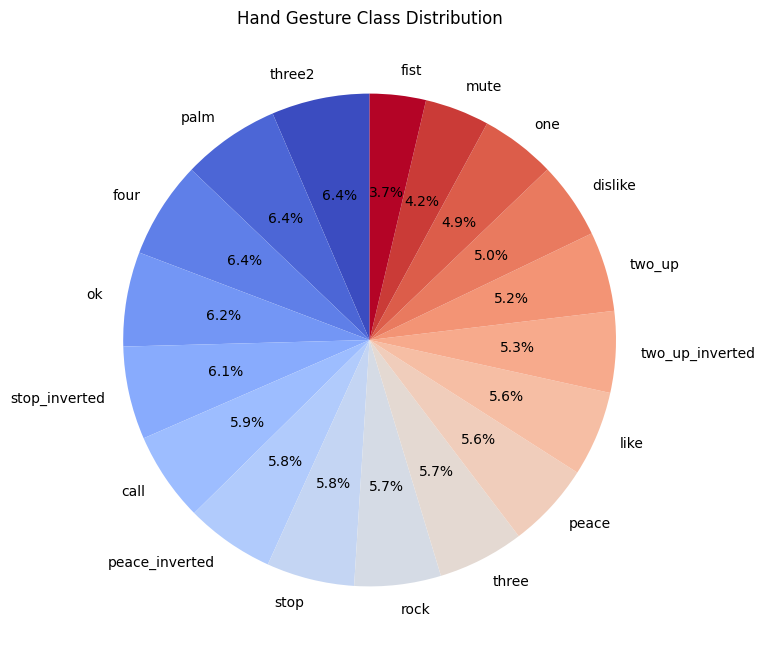

In [ ]:
plt.figure(figsize=(8, 8))
df["label"].value_counts().plot.pie(
    autopct="%1.1f%%",  # Show percentages
    startangle=90,  # Rotate for better alignment
    cmap="coolwarm"
)
plt.title("Hand Gesture Class Distribution")
plt.ylabel("")  # Hide y-label for better appearance
plt.show()

#### Correlation Heatmap

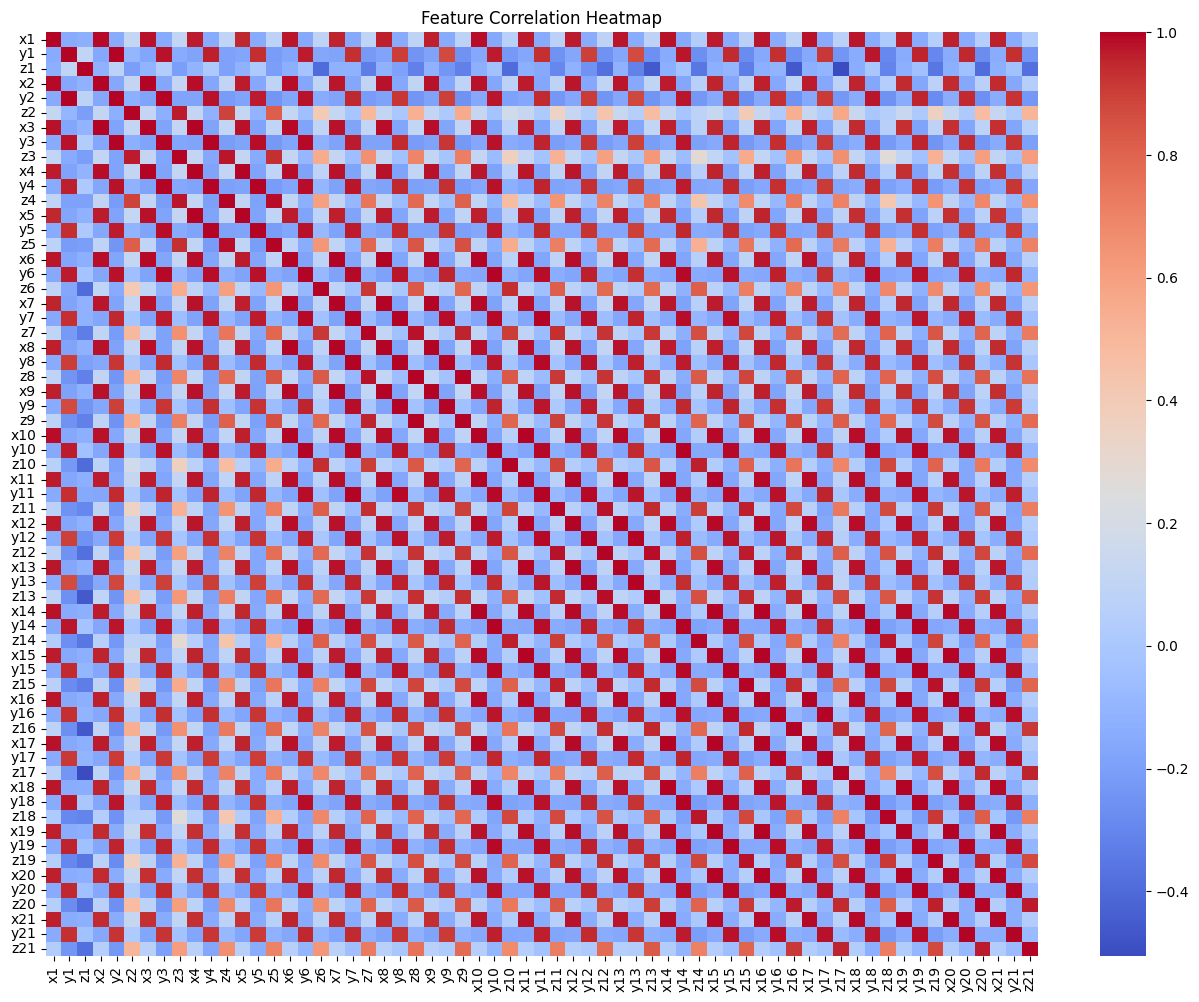

In [ ]:
# Compute correlation matrix
correlation_matrix = df.drop(columns="label").corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Data Preprocessing

##### Check null values

In [ ]:
# Check missing values
null_counts = df.isnull().sum()
null_counts

,0
x1,0
y1,0
z1,0
x2,0
y2,0
...,...
z20,0
x21,0
y21,0
z21,0


In [ ]:
null_counts[null_counts > 0]  # Display only columns with missing values

,0


##### Check duplicates

In [ ]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

#### Data Normalization

In [ ]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [ ]:
def normalize_hand_landmarks(df):
    """
    Normalize hand landmarks by:
    1. Re-centering all points to the wrist (landmark 0).
    2. Scaling all points based on the distance to the mid-finger tip (landmark 12).

    Args:
        df: DataFrame with columns x1,y1,z1,x2,y2,z2,...,x21,y21,z21,label

    Returns:
        Normalized DataFrame
    """
    num_landmarks = 21  # Total hand landmarks

    # Create sorted column lists
    x_cols = [f'x{i}' for i in range(1, num_landmarks+1)]
    y_cols = [f'y{i}' for i in range(1, num_landmarks+1)]
    z_cols = [f'z{i}' for i in range(1, num_landmarks+1)]

    # Convert to NumPy arrays
    x_values = df[x_cols].values.astype(float)
    y_values = df[y_cols].values.astype(float)

    # Recenter landmarks (subtract wrist coordinates)
    wrist_x = x_values[:, 0].copy()
    wrist_y = y_values[:, 0].copy()

    x_values -= wrist_x[:, np.newaxis]
    y_values -= wrist_y[:, np.newaxis]

    # Step 2: Scale using mid-finger tip (landmark 12 in 0-based index)
    mid_x = x_values[:, 12]
    mid_y = y_values[:, 12]

    # Calculate scale factor
    scale_factor = np.sqrt(mid_x**2 + mid_y**2)

    x_values /= scale_factor[:, np.newaxis]
    y_values /= scale_factor[:, np.newaxis]

    # Update DataFrame
    df[x_cols] = x_values
    df[y_cols] = y_values

    return df

In [ ]:
# Normalize landmarks
normalized_df = normalize_hand_landmarks(df)

# Check the transformed data
normalized_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


In [ ]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.0,25675.0,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,0.0,0.0,1.272461e-07,0.014740,-0.139833,-0.009465,0.025192,-0.336521,-0.015946,0.028839,...,-0.024129,0.008403,-0.557311,-0.033751,0.007659,-0.541289,-0.032208,0.007758,-0.540012,-0.028828
std,0.0,0.0,2.737932e-07,0.243225,0.217575,0.010376,0.434557,0.425219,0.013973,0.509919,...,0.015658,0.629326,0.509256,0.020453,0.628093,0.555028,0.020877,0.640435,0.620496,0.021136
min,0.0,0.0,-2.029986e-06,-5.834705,-1.392862,-0.096630,-13.681659,-2.760927,-0.155846,-17.489483,...,-0.201897,-28.505611,-34.657750,-0.286821,-30.736563,-40.190918,-0.286470,-32.398157,-44.058062,-0.262047
25%,0.0,0.0,-5.243216e-08,-0.156725,-0.209768,-0.015199,-0.266598,-0.534523,-0.023020,-0.291434,...,-0.030728,-0.252365,-0.612102,-0.042726,-0.248055,-0.699451,-0.041957,-0.237035,-0.773254,-0.039220
50%,0.0,0.0,1.497277e-07,0.086394,-0.122418,-0.008737,0.087623,-0.301500,-0.014231,0.028274,...,-0.020969,-0.048674,-0.517549,-0.029942,-0.032086,-0.502716,-0.028510,-0.018237,-0.436731,-0.025269
75%,0.0,0.0,2.989988e-07,0.169421,-0.078231,-0.002783,0.299678,-0.227268,-0.007134,0.362566,...,-0.013661,0.255795,-0.399171,-0.019987,0.250618,-0.323693,-0.017971,0.239970,-0.260496,-0.014294
max,0.0,0.0,1.876254e-06,1.207385,8.901224,0.076365,1.872273,18.811699,0.094131,2.512387,...,0.031774,2.941622,1.206058,0.078105,3.571379,1.414245,0.104580,3.850528,1.678562,0.118668


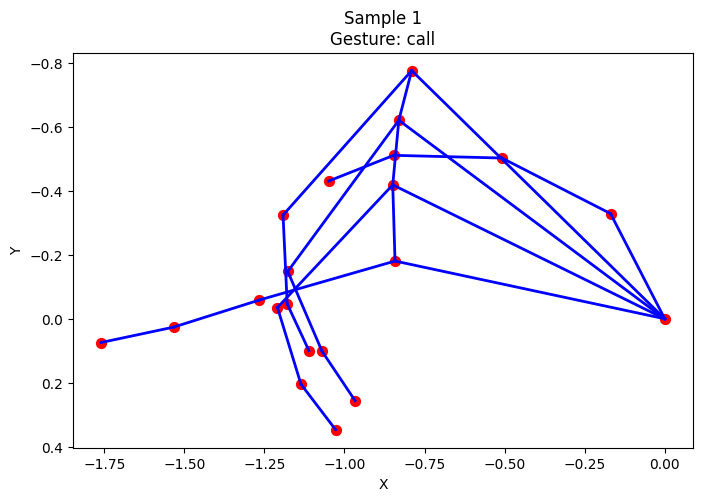

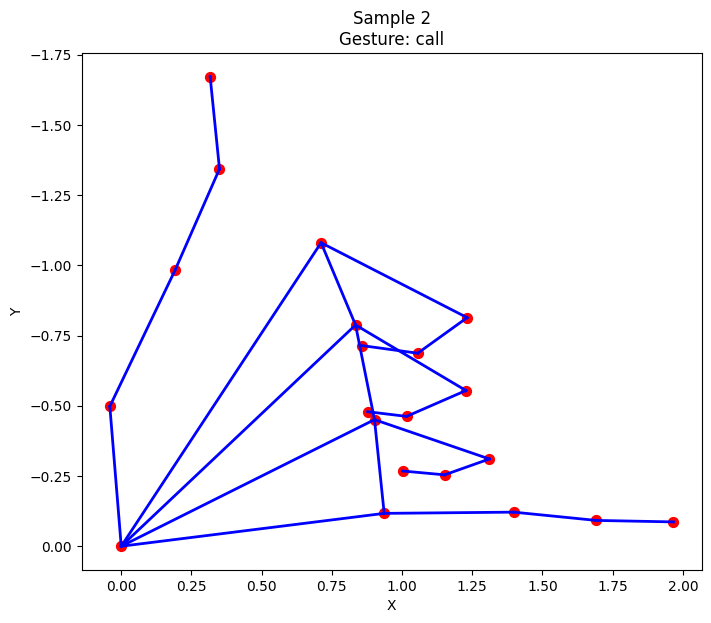

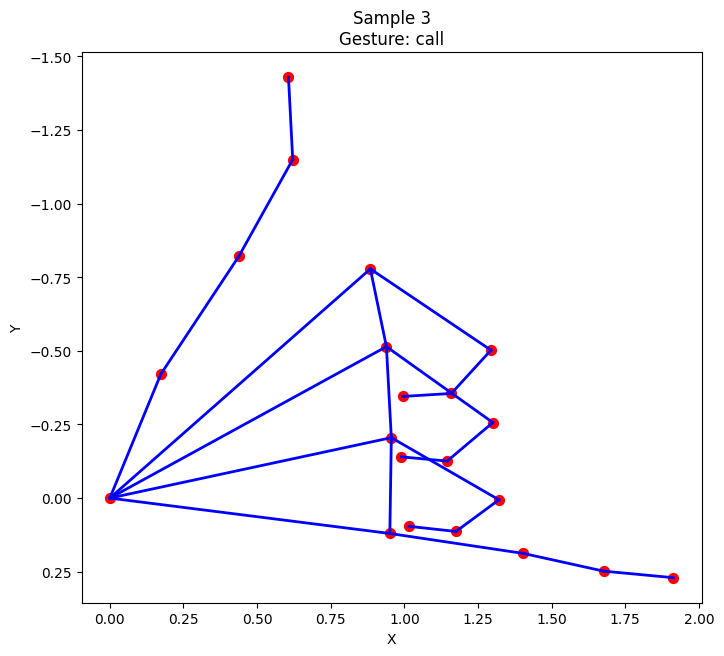

In [ ]:
# Visualize first few samples after normalization
for i in range(min(3, len(normalized_df))):  # Show first 3 samples
    row_data = normalized_df.iloc[i].values
    plot_hand_2d(row_data, title=f"Sample {i+1}")
    plt.show()

#### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

label_encoder = LabelEncoder()

normalized_df['label'] = label_encoder.fit_transform(normalized_df['label'])

with open('/content/drive/MyDrive/SupervisedML_Project/labels.json', 'w') as f:
    json.dump(label_encoder.classes_.tolist(), f)

# Print encoding mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'call': np.int64(0), 'dislike': np.int64(1), 'fist': np.int64(2), 'four': np.int64(3), 'like': np.int64(4), 'mute': np.int64(5), 'ok': np.int64(6), 'one': np.int64(7), 'palm': np.int64(8), 'peace': np.int64(9), 'peace_inverted': np.int64(10), 'rock': np.int64(11), 'stop': np.int64(12), 'stop_inverted': np.int64(13), 'three': np.int64(14), 'three2': np.int64(15), 'two_up': np.int64(16), 'two_up_inverted': np.int64(17)}


### Feature Selection

In [ ]:
# Splitting features and label
X = normalized_df.drop(columns=['label'])
y = normalized_df['label']

#### Checking feature importace

In [ ]:
# Checking the most important features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X, y)

# Get the importance of the resulting features
importances = model.feature_importances_

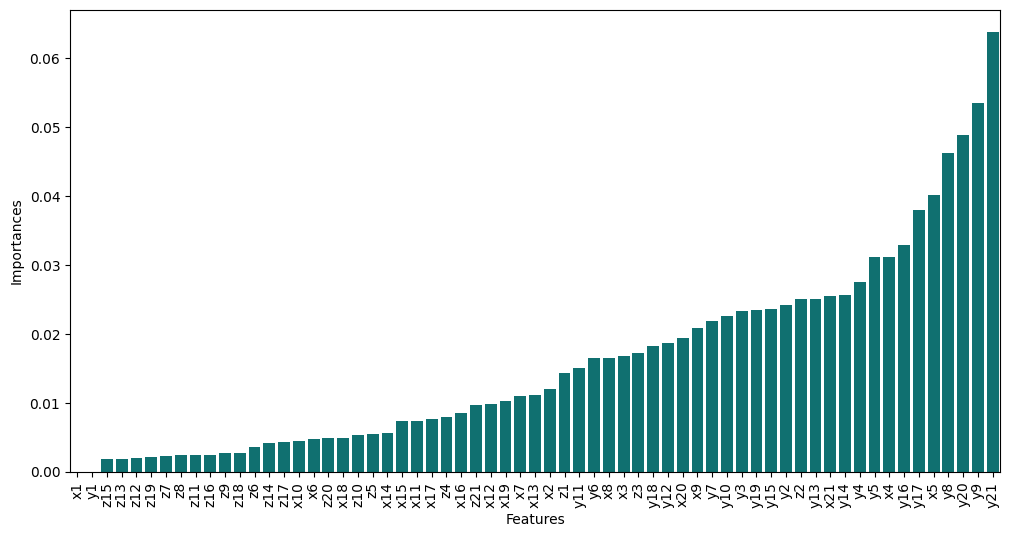

In [ ]:
# Create a data frame for visualization
importance_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 'Importances': importances})
importance_df.set_index('Importances')

# Sort in ascending order for better visualization
importance_df = importance_df.sort_values('Importances')

# Plot the feature importances in bars
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df.iloc[:, 0], y=importance_df.iloc[:, 1], color="teal")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove features with importance < 0.01
threshold = 0.01
selected_features = importance_df[importance_df['Importances'] > threshold].sort_values(by='Importances')

# Get the sorted list of selected features
selected_features = selected_features['Features'].tolist()

# Display the selected features
print("Selected Features (Sorted based on importance):", selected_features)

Selected Features (Sorted based on importance): ['x19', 'x7', 'x13', 'x2', 'z1', 'y11', 'y6', 'x8', 'x3', 'z3', 'y18', 'y12', 'x20', 'x9', 'y7', 'y10', 'y3', 'y19', 'y15', 'y2', 'z2', 'y13', 'x21', 'y14', 'y4', 'y5', 'x4', 'y16', 'y17', 'x5', 'y8', 'y20', 'y9', 'y21']


In [ ]:
# Select only the important features from the original DataFrame
X_selected = X[selected_features]

# Joining the selected features with the label
df_selected = X_selected.join(df[['label']])

# Display the updated DataFrame
df_selected.head()

,x19,x7,x13,x2,z1,y11,y6,x8,x3,z3,...,y5,x4,y16,y17,x5,y8,y20,y9,y21,label
0,-1.266027,-1.191733,-0.966743,-0.169097,-3.649205e-07,-0.147843,-0.774934,-1.178722,-0.508248,0.005798,...,-0.430028,-0.846234,0.204247,0.346557,-1.049310,-0.046312,0.026072,0.099134,0.074168,0
1,1.397837,1.231911,0.877756,-0.040618,-2.345265e-07,-0.554555,-1.080847,1.055781,0.191551,-0.021096,...,-1.672864,0.349889,-0.254250,-0.267929,0.316538,-0.687397,-0.091952,-0.714327,-0.086635,0
2,1.404373,1.294109,0.990136,0.172978,-2.417307e-07,-0.256563,-0.778230,1.159693,0.437913,-0.009687,...,-1.428665,0.621006,0.113272,0.095879,0.606619,-0.355376,0.247919,-0.345127,0.270275,0
3,1.280797,1.045157,0.847336,-0.020056,-1.233261e-07,-0.663329,-0.978783,0.907901,0.070355,-0.008911,...,-1.551957,0.114792,-0.350477,-0.304591,0.075864,-0.798877,-0.079763,-0.779399,-0.086693,0
4,1.327537,1.071633,0.815049,-0.009611,-1.622995e-07,-0.753648,-1.082358,0.943552,0.111650,-0.008115,...,-1.798027,0.131602,-0.378658,-0.358153,-0.019465,-0.851236,-0.386821,-0.808991,-0.464123,0


#### Checking linear correlation

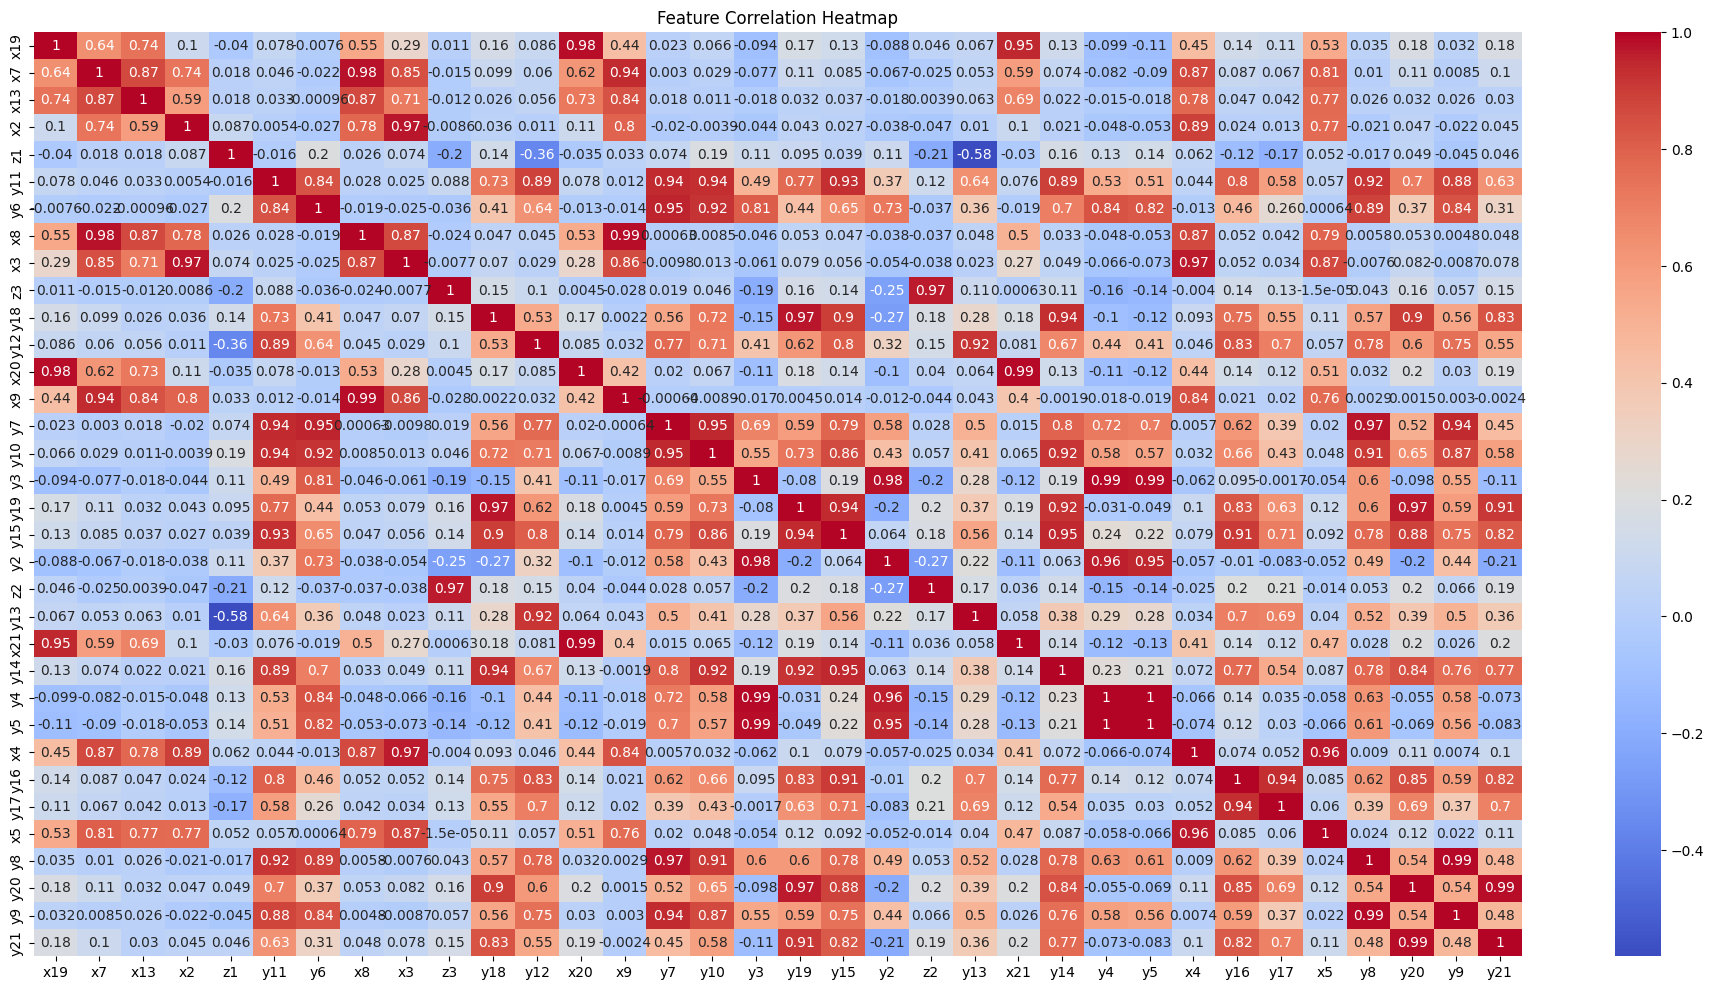

In [ ]:
# Compute correlation matrix
correlation_matrix = X_selected.corr()

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

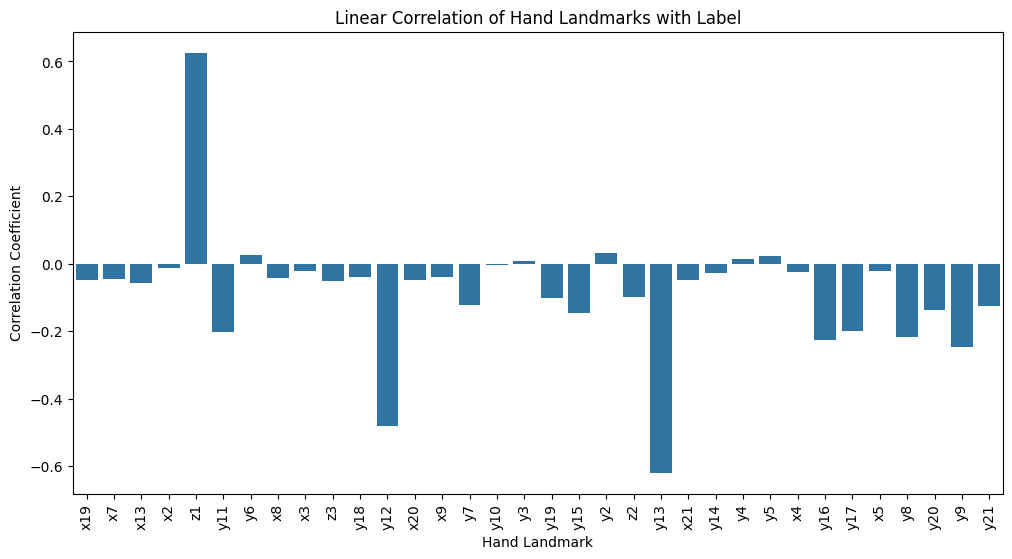

In [ ]:
# Compute correlation between each feature and the numeric label
correlation_with_label = df_selected.iloc[:, :-1].corrwith(df['label'])

# Plot the correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_label.index, y=correlation_with_label.values)
plt.xticks(rotation=90)
plt.title('Linear Correlation of Hand Landmarks with Label')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Hand Landmark')
plt.show()

##### Removing extremly high correlated features

In [ ]:
correlation_matrix = X_selected.corr()

# Set correlation threshold (0.9)
threshold = 0.95

# Create a list of features to remove based on correlation and importance
to_remove = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]

            # Check the importance of the correlated features
            importance_i = sorted(importances)[X_selected.columns.get_loc(feature_i)]
            importance_j = sorted(importances)[X_selected.columns.get_loc(feature_j)]

            # Remove the less important feature
            if importance_i < importance_j:
                to_remove.add(feature_i)  # Remove feature_i if its importance is lower
            else:
                to_remove.add(feature_j)  # Remove feature_j if its importance is lower

# Display the features to remove
print("Features to remove:", to_remove)
len(to_remove)

Features to remove: {'y18', 'x8', 'z3', 'y4', 'y8', 'y20', 'x7', 'y3', 'x4', 'x3', 'y6', 'x2', 'y19', 'y7', 'y2', 'x20', 'x19'}


17

In [ ]:
# Remove the selected features
X_new = X_selected.drop(columns=to_remove)

# Add the selected features back to the original DataFrame
df_new = X_new.join(df_selected[['label']])

# Display the updated DataFrame
df_new.head()

,x13,z1,y11,y12,x9,y10,y15,z2,y13,x21,y14,y5,y16,y17,x5,y9,y21,label
0,-0.966743,-3.649205e-07,-0.147843,0.101288,-1.111019,-0.619818,-0.035114,0.004224,0.255751,-1.759842,-0.418112,-0.430028,0.204247,0.346557,-1.049310,0.099134,0.074168,0
1,0.877756,-2.345265e-07,-0.554555,-0.462428,0.858762,-0.788034,-0.310764,-0.011102,-0.479107,1.966655,-0.450878,-1.672864,-0.254250,-0.267929,0.316538,-0.714327,-0.086635,0
2,0.990136,-2.417307e-07,-0.256563,-0.125685,0.993974,-0.514345,0.005723,-0.000184,-0.140112,1.913833,-0.205272,-1.428665,0.113272,0.095879,0.606619,-0.345127,0.270275,0
3,0.847336,-1.233261e-07,-0.663329,-0.587880,0.716182,-0.701657,-0.405546,-0.002824,-0.531057,1.738331,-0.404957,-1.551957,-0.350477,-0.304591,0.075864,-0.779399,-0.086693,0
4,0.815049,-1.622995e-07,-0.753648,-0.607865,0.750772,-0.809056,-0.491475,-0.002884,-0.579391,1.849127,-0.516624,-1.798027,-0.378658,-0.358153,-0.019465,-0.808991,-0.464123,0


In [ ]:
df_new.shape

(25675, 18)

##### Show final heatmap

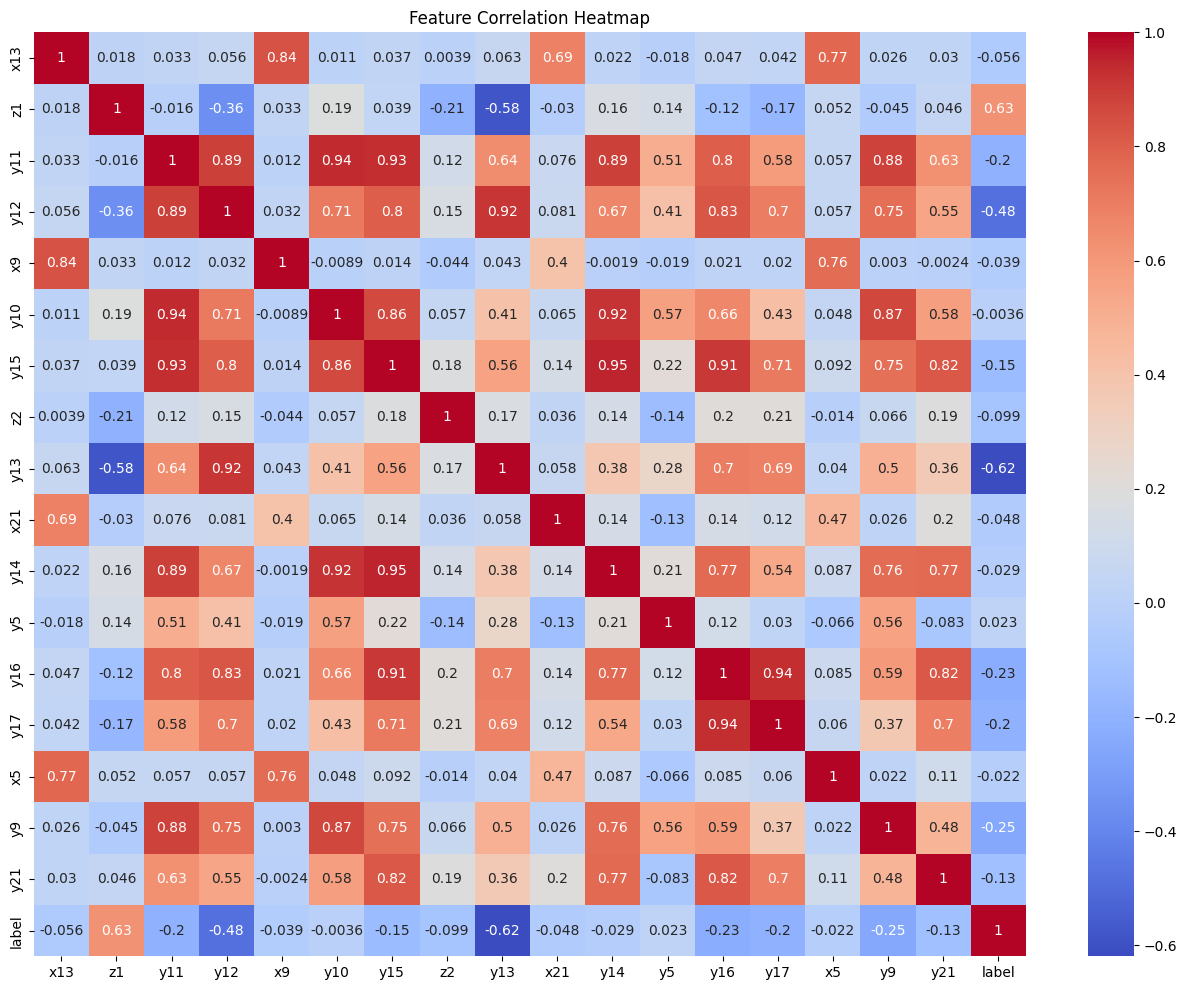

In [ ]:
# Compute correlation matrix
correlation_matrix = df_new.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

### Data Splitting

In [ ]:
# Splitting features and label

X = df_new.drop(columns=['label'])
y = df_new['label']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (70% train, 15% validation, 15% test)
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test,
    test_size=0.5,
    random_state=42,
    stratify=y_val_test
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 17972 samples
Validation set: 3851 samples
Test set: 3852 samples


### Model Selection

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_val_pred = knn_model.predict(X_val)

In [ ]:
# Calculating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# KNN Metrics
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
knn_val_precision = precision_score(y_val, knn_val_pred, average='weighted')
knn_val_recall = recall_score(y_val, knn_val_pred, average='weighted')
knn_val_f1 = f1_score(y_val, knn_val_pred, average='weighted')

In [ ]:
print(f'KNN Validation Accuracy: {knn_val_accuracy}')
print(f'KNN Validation Precision : {knn_val_precision}')
print(f'KNN Validation Recall: {knn_val_recall}')
print(f'KNN Validation f1_score: {knn_val_f1}')

KNN Validation Accuracy: 0.9732537003375746
KNN Validation Precision : 0.9736880414282805
KNN Validation Recall: 0.9732537003375746
KNN Validation f1_score: 0.9733073635906077


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_val_pred = rf_model.predict(X_val)

In [ ]:
# Calculating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Metrics
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
rf_val_precision = precision_score(y_val, rf_val_pred, average='weighted')
rf_val_recall = recall_score(y_val, rf_val_pred, average='weighted')
rf_val_f1 = f1_score(y_val, rf_val_pred, average='weighted')

In [ ]:
print(f'RF Validation Accuracy: {rf_val_accuracy}')
print(f'RF Validation Precision : {rf_val_precision}')
print(f'RF Validation Recall: {rf_val_recall}')
print(f'RF Validation f1_score: {rf_val_f1}')

RF Validation Accuracy: 0.9750714100233705
RF Validation Precision : 0.9752760287388655
RF Validation Recall: 0.9750714100233705
RF Validation f1_score: 0.9751089605258049


#### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
svm_val_pred = svm_model.predict(X_val)

In [ ]:
# SVM Metrics
svm_val_accuracy = accuracy_score(y_val, svm_val_pred)
svm_val_precision = precision_score(y_val, svm_val_pred, average='weighted')
svm_val_recall = recall_score(y_val, svm_val_pred, average='weighted')
svm_val_f1 = f1_score(y_val, svm_val_pred, average='weighted')

In [ ]:
print(f'SVM Validation Accuracy: {svm_val_accuracy}')
print(f'SVM Validation Precision : {svm_val_precision}')
print(f'SVM Validation Recall: {svm_val_recall}')
print(f'SVM Validation f1_score: {svm_val_f1}')

SVM Validation Accuracy: 0.9143079719553363
SVM Validation Precision : 0.9186954721447331
SVM Validation Recall: 0.9143079719553363
SVM Validation f1_score: 0.9144013871140636


#### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_val_pred = xgb_model.predict(X_val)

In [ ]:
# XGBoost Metrics
xgb_val_accuracy = accuracy_score(y_val, xgb_val_pred)
xgb_val_precision = precision_score(y_val, xgb_val_pred, average='weighted')
xgb_val_recall = recall_score(y_val, xgb_val_pred, average='weighted')
xgb_val_f1 = f1_score(y_val, xgb_val_pred, average='weighted')

In [ ]:
print(f'XGBoost Validation Accuracy: {xgb_val_accuracy}')
print(f'XGBoost Validation Precision : {xgb_val_precision}')
print(f'XGBoost Validation Recall: {xgb_val_recall}')
print(f'XGBoost Validation f1_score: {xgb_val_f1}')

XGBoost Validation Accuracy: 0.9810438847052714
XGBoost Validation Precision : 0.9812173707747984
XGBoost Validation Recall: 0.9810438847052714
XGBoost Validation f1_score: 0.9810798553443393


##### Comparing Models Results

In [ ]:
validation_results = {
  'Model': ['KNN','Random Forest', 'SVM', 'XGBoost'],
  'Accuracy': [knn_val_accuracy, rf_val_accuracy, svm_val_accuracy, xgb_val_accuracy],
  'Precision': [knn_val_precision, rf_val_precision, svm_val_precision, xgb_val_precision],
  'Recall': [knn_val_recall, rf_val_recall, svm_val_recall, xgb_val_recall],
  'F1-Score': [knn_val_f1, rf_val_f1, svm_val_f1, xgb_val_f1]
}

validation_results_df = pd.DataFrame(validation_results)
print("Model Comparison Results (Validation Set):")
validation_results_df

Model Comparison Results (Validation Set):


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.973254,0.973688,0.973254,0.973307
1,Random Forest,0.975071,0.975276,0.975071,0.975109
2,SVM,0.914308,0.918695,0.914308,0.914401
3,XGBoost,0.981044,0.981217,0.981044,0.981080


### The Selected Model (XGBoost)

In [ ]:
# Calculate metrics for XGBoost on Test Set

xgb_test_pred = xgb_model.predict(X_test)

xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_precision = precision_score(y_test, xgb_test_pred, average='weighted')
xgb_test_recall = recall_score(y_test, xgb_test_pred, average='weighted')
xgb_test_f1 = f1_score(y_test, xgb_test_pred, average='weighted')

In [ ]:
print(f'XGBoost Test Accuracy: {xgb_test_accuracy}')
print(f'XGBoost Test Precision : {xgb_test_precision}')
print(f'XGBoost Test Recall: {xgb_test_recall}')
print(f'XGBoost Test f1_score: {xgb_test_f1}')

XGBoost Test Accuracy: 0.979491173416407
XGBoost Test Precision : 0.9795931877951564
XGBoost Test Recall: 0.979491173416407
XGBoost Test f1_score: 0.9795060763039776


#### Confusion Matrix

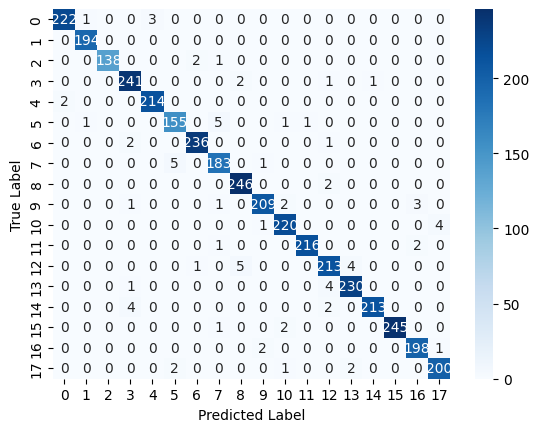

In [ ]:
# Show Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xgb_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Saving the model

In [ ]:
import joblib

joblib.dump(xgb_model, '/content/drive/MyDrive/SupervisedML_Project/gesture_classification.pkl')  # Save the model

['/content/drive/MyDrive/SupervisedML_Project/gesture_classification.pkl']

### Selected Model Optimization

#### Applying Randomized Search

In [ ]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=50, cv=3, random_state=42,
    verbose=2, n_jobs=-1, scoring='accuracy', return_train_score=True
)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=2)

In [ ]:
# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Best Score: 0.9803027022447974


In [ ]:
# Evaluate on the test data
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.9815680166147456


#### Checking Metrics

In [ ]:
xgb_best_val_pred = best_model.predict(X_val)

In [ ]:
# Metrics on validation set
xgb_best_val_accuracy = accuracy_score(y_val, xgb_best_val_pred)
xgb_best_val_precision = precision_score(y_val, xgb_best_val_pred, average='weighted')
xgb_best_val_recall = recall_score(y_val, xgb_best_val_pred, average='weighted')
xgb_best_val_f1 = f1_score(y_val, xgb_best_val_pred, average='weighted')

In [ ]:
print(f'Best XGBoost Validation Accuracy: {xgb_best_val_accuracy}')
print(f'Best XGBoost Validation Precision : {xgb_best_val_precision}')
print(f'Best XGBoost Validation Recall: {xgb_best_val_recall}')
print(f'Best XGBoost Validation f1_score: {xgb_best_val_f1}')

Best XGBoost Validation Accuracy: 0.9823422487665542
Best XGBoost Validation Precision : 0.982471943151535
Best XGBoost Validation Recall: 0.9823422487665542
Best XGBoost Validation f1_score: 0.9823781471054686


In [ ]:
# Metrics on Test Set

xgb_best_test_pred = best_model.predict(X_test)

xgb_best_test_accuracy = accuracy_score(y_test, xgb_best_test_pred)
xgb_best_test_precision = precision_score(y_test, xgb_best_test_pred, average='weighted')
xgb_best_test_recall = recall_score(y_test, xgb_best_test_pred, average='weighted')
xgb_best_test_f1 = f1_score(y_test, xgb_best_test_pred, average='weighted')

In [ ]:
print(f'Best XGBoost Test Accuracy: {xgb_best_test_accuracy}')
print(f'Best XGBoost Test Precision : {xgb_best_test_precision}')
print(f'Best XGBoost Test Recall: {xgb_best_test_recall}')
print(f'Best XGBoost Test f1_score: {xgb_best_test_f1}')

Best XGBoost Test Accuracy: 0.9815680166147456
Best XGBoost Test Precision : 0.9816265060978777
Best XGBoost Test Recall: 0.9815680166147456
Best XGBoost Test f1_score: 0.9815647525118155


#### Confusion Matrix

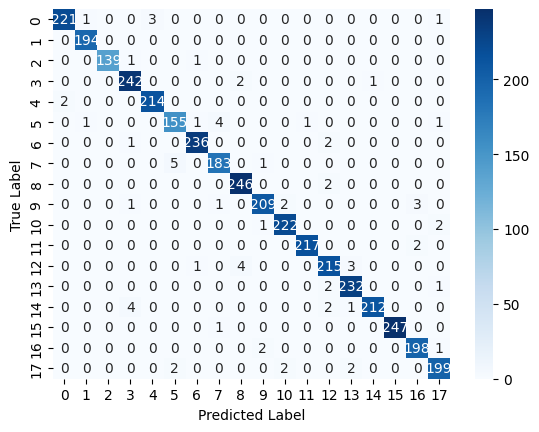

In [ ]:
# Show Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xgb_best_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Saving Best Model

In [ ]:
# Save the best model
joblib.dump(best_model, "/content/drive/MyDrive/SupervisedML_Project/best_xgb_model_random_search.pkl")

['/content/drive/MyDrive/SupervisedML_Project/best_xgb_model_random_search.pkl']